In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
fifa18 = pd.read_csv("data/fifa18.csv", index_col=0, low_memory=False)

Before any analysis is conducted, it is highly recommended to look into data.

In [3]:
fifa18.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Seems that the players are sorted by `Overall`.

In [4]:
fifa18.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [23]:
fifa18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null object
Curve                  17981 non-null ob

In [4]:
print(fifa18['Acceleration'].max())
print(fifa18['Acceleration'].min())

96
11


As we can notice, player attribute columns (`Acceleration` to `Volleys`) are of type `object`. We want to convert the attributes to numeric, since in reality each attribute gets integer value from 1 to 99. Player ID is also a categorical variable. 

Columns from `CAM` to `ST` excluding `ID` and `Preferred Positions` indicate what is the in-game overall of the player when playing on that position. These columns contain lots of missing values, because for goalkeepers these values are not present. This is important observation, because if we now were to drop all rows which have missing values, we would accidentally get rid of all the goalkeepers. 

In [16]:
fifa18[fifa18['Preferred Positions'].str.contains('GK')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2029 entries, 4 to 17977
Data columns (total 74 columns):
Name                   2029 non-null object
Age                    2029 non-null int64
Photo                  2029 non-null object
Nationality            2029 non-null object
Flag                   2029 non-null object
Overall                2029 non-null int64
Potential              2029 non-null int64
Club                   1987 non-null object
Club Logo              2029 non-null object
Value                  2029 non-null object
Wage                   2029 non-null object
Special                2029 non-null int64
Acceleration           2029 non-null object
Aggression             2029 non-null object
Agility                2029 non-null object
Balance                2029 non-null object
Ball control           2029 non-null object
Composure              2029 non-null object
Crossing               2029 non-null object
Curve                  2029 non-null object
Dribbling       

In [17]:
fifa18.loc[:,'Acceleration':'Volleys'] = fifa18.loc[:,'Acceleration':'Volleys'].apply(pd.to_numeric, 
                                                                                      errors='coerce')
fifa18['ID'] = fifa18['ID'].astype('category')

In [18]:
fifa18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17897 non-null float64
Aggression             17913 non-null float64
Agility                17910 non-null float64
Balance                17924 non-null float64
Ball control           17840 non-null float64
Composure              17887 non-null float64
Crossing               17885 non-null float64
Curve                  17908 non-

Conversion has generated some missing values, but that is not a big issue. For further analysis, we can drop the players who have missing attributes. 

In [19]:
fifa18 = fifa18.dropna(subset=fifa18.loc[:,:'Volleys'].columns)

Now lets examine the data visually. How are the player overall values distributed?

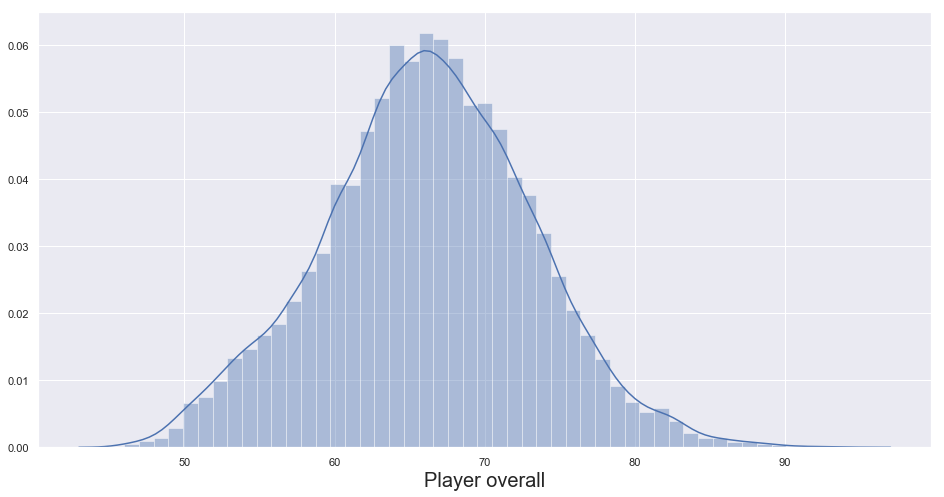

In [20]:
bins = len(fifa18['Overall'].unique())

sns.set()
fig, ax = plt.subplots(figsize=(16, 8))

sns.distplot(fifa18['Overall'], bins=bins)

plt.xlabel("Player overall", fontsize=20)
plt.show()

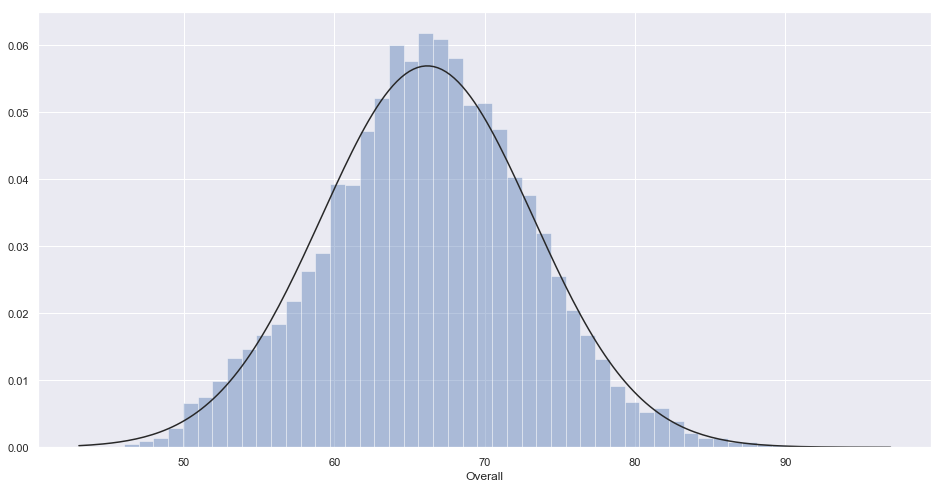

In [21]:
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(16, 8))

sns.distplot(fifa18['Overall'], bins=bins, kde=False, fit=norm)

plt.show()

The column `Overall` seems to be approximately normally distributed. This is useful for futher analysis.

Let's look at the relationship between the attributes. Simply for the sake of plot clarity, only first 5 attributes and 100 random players are selected. 

In [22]:
attributes = fifa18.loc[:, "Acceleration":"Volleys"]

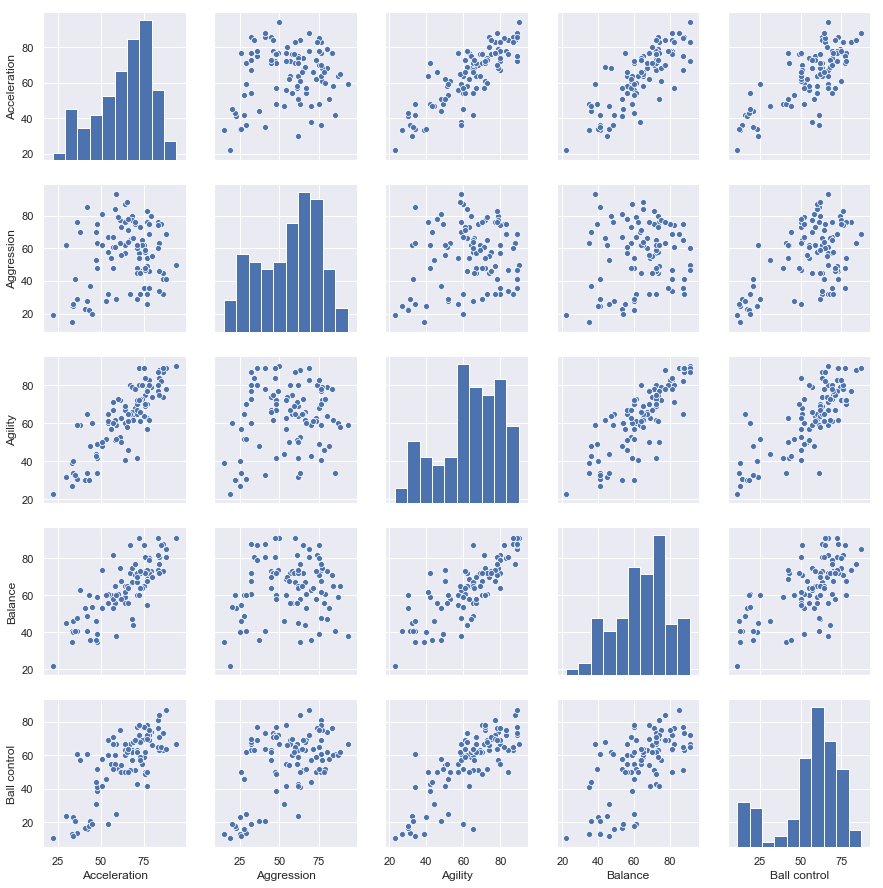

In [23]:
npr.seed(13)

sns.pairplot(attributes.iloc[npr.choice(len(attributes),size=100), :5])

plt.show()

We can also create a correlation matrix to inspect the relationships between the attributes.

In [24]:
corr_matrix = attributes.corr(method='pearson')
corr_matrix.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys
Acceleration,1.0,0.25,0.8,0.7,0.67,0.44,0.66,0.6,0.74,0.6,0.49,-0.58,-0.59,-0.58,-0.58,-0.58,0.33,0.15,0.21,0.43,0.57,0.13,0.53,0.67,0.19,0.56,0.54,0.15,0.92,0.61,0.15,-0.17,0.46,0.57
Aggression,0.25,1.0,0.23,0.18,0.54,0.58,0.47,0.39,0.42,0.23,0.4,-0.57,-0.57,-0.56,-0.56,-0.57,0.69,0.74,0.36,0.58,0.39,0.72,0.34,0.38,0.4,0.6,0.5,0.71,0.28,0.64,0.73,0.47,0.3,0.32
Agility,0.8,0.23,1.0,0.77,0.7,0.49,0.69,0.67,0.76,0.63,0.58,-0.52,-0.51,-0.51,-0.51,-0.52,0.26,0.13,0.21,0.51,0.64,0.089,0.56,0.7,0.28,0.61,0.56,0.11,0.75,0.56,0.11,-0.25,0.59,0.62
Balance,0.7,0.18,0.77,1.0,0.6,0.37,0.61,0.58,0.66,0.51,0.51,-0.5,-0.51,-0.5,-0.5,-0.51,0.17,0.14,0.19,0.46,0.52,0.12,0.48,0.59,0.14,0.54,0.45,0.15,0.64,0.47,0.14,-0.41,0.49,0.51
Ball control,0.67,0.54,0.7,0.6,1.0,0.76,0.84,0.83,0.93,0.79,0.77,-0.78,-0.78,-0.78,-0.78,-0.78,0.65,0.4,0.17,0.78,0.83,0.36,0.77,0.86,0.43,0.91,0.83,0.37,0.66,0.72,0.4,0.074,0.72,0.79
Composure,0.44,0.58,0.49,0.37,0.76,1.0,0.65,0.67,0.68,0.59,0.64,-0.55,-0.55,-0.55,-0.54,-0.55,0.61,0.45,0.26,0.69,0.67,0.4,0.62,0.65,0.6,0.76,0.7,0.39,0.44,0.61,0.42,0.27,0.63,0.64
Crossing,0.66,0.47,0.69,0.61,0.84,0.65,1.0,0.83,0.85,0.65,0.76,-0.66,-0.66,-0.66,-0.66,-0.66,0.47,0.42,0.12,0.76,0.74,0.39,0.65,0.78,0.38,0.81,0.71,0.4,0.64,0.66,0.42,-0.041,0.68,0.69
Curve,0.6,0.39,0.67,0.58,0.83,0.67,0.83,1.0,0.84,0.75,0.86,-0.61,-0.6,-0.6,-0.61,-0.61,0.45,0.27,0.09,0.71,0.83,0.21,0.75,0.81,0.41,0.78,0.78,0.23,0.58,0.59,0.25,-0.041,0.74,0.8
Dribbling,0.74,0.42,0.76,0.66,0.93,0.68,0.85,0.84,1.0,0.82,0.75,-0.75,-0.74,-0.74,-0.74,-0.75,0.54,0.27,0.12,0.71,0.84,0.24,0.77,0.89,0.35,0.84,0.8,0.25,0.72,0.67,0.27,-0.055,0.73,0.81
Finishing,0.6,0.23,0.63,0.51,0.79,0.59,0.65,0.75,0.82,1.0,0.69,-0.58,-0.58,-0.58,-0.58,-0.58,0.47,-0.033,0.075,0.51,0.87,-0.083,0.83,0.88,0.32,0.66,0.8,-0.086,0.59,0.5,-0.05,-0.022,0.69,0.88


There seems to be strong positive correlation e.g. between `Sprint speed` and `Acceleration` and between `Ball control` and `Dribbling`. On the other hand `Strength` does not seem to correlate with any other attribute. We can also see that the goalkeeper attributes correlate with each other but not with any other attributes.

One interesting question is if we know value for each attribute, can we predict the player overall rating. In order to study this properly, it is considered good practice to first split the data to training and test set.  

In [25]:
npr.seed(13)

index_train = npr.choice(len(fifa18), size=2000, replace=False) # Randomly select training set of size 2000

fifa18_train = fifa18.iloc[index_train, :].loc[:, :'Volleys'] # Select the training data and drop columns after attributes since we don't really need them

Now we are ready to fit the model.

In [26]:
X_train = fifa18_train.loc[:, 'Acceleration':'Volleys'] # The attributes are the explanatory variables
y_train = fifa18_train["Overall"] # Overall rating is the response we are trying to predict

In [47]:
model = sm.OLS(y_train, sm.add_constant(X_train)) # Add constant term to model.
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Overall   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     302.6
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        01:37:44   Log-Likelihood:                -4876.9
No. Observations:                2000   AIC:                             9824.
Df Residuals:                    1965   BIC:                         1.002e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.2475      0

The $R^2$ might seem low, but there are couple of good reasons for this. Among FIFA players it is generally assumed that overall is calculated differently for players in different positions. This means that we could get higher $R^2$-value if we fit the model e. g. only for strikers ('ST'). In addition to that, in the game each player also has ratings for skill moves and weaker foot (rated 1-5 stars) and attacking and defensive working rate (Low/Medium/High). These attributes might also affect the overall, but unfortunately they are not present in our dataset. 

It is also noteworthy that not all the attributes seem to be statistically significant predictors. This might be caused by multicollinearity between the explanatory variables.

The next step is to use the remaining data as a test set for prediction.

In [48]:
fifa18_test = fifa18[fifa18.index.isin(index_train)==False].loc[:, :'Volleys'] # Select only the rows that are not in the training set

X_test = fifa18_test.loc[:, 'Acceleration':'Volleys'] 
y_test = fifa18_test["Overall"]

Now it's time to find out how our model performs with the test data. Let's use mean squared error as the performance metric. 

In [53]:
from sklearn.metrics import mean_squared_error

print("Mean squared error for the test data:", mean_squared_error(result.predict(sm.add_constant(X_test)), y_test))
print("Mean squared error for the train data:", mean_squared_error(result.fittedvalues, y_train))

Mean squared error for the test data: 7.59696329441428
Mean squared error for the train data: 7.683075537242794


From statistical point of view, it is also crucial to check that the assumptions of linear model are valid. Probably the most fundamental assumption is that the error terms are independent and normally distributed with zero mean and equal variance. Error terms are defined as the difference between the actual response value and the predicted (fitted) value. Common problem for regression models is heteroscedasticity, which means that the error terms typically increase with the predicted values.

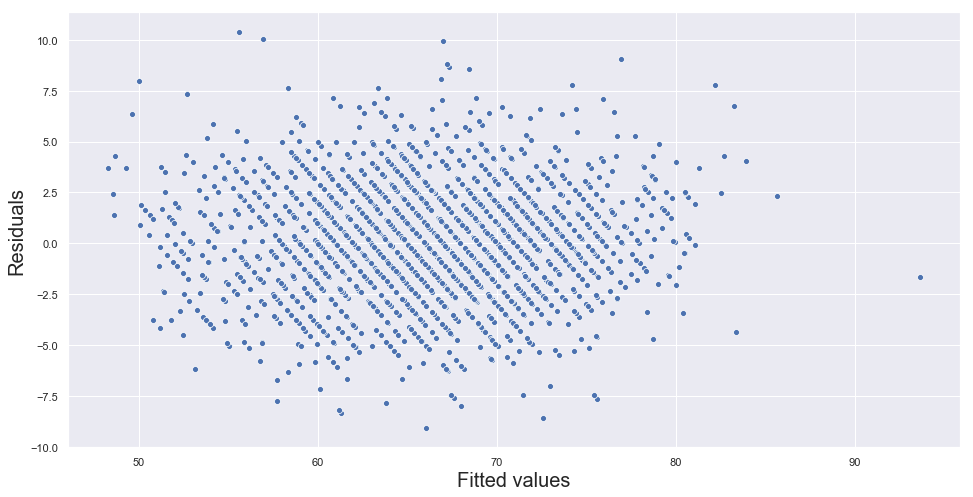

In [54]:
fig, ax = plt.subplots(figsize=(16,8))

sns.scatterplot(result.fittedvalues, result.resid)

plt.ylabel("Residuals", fontsize=20)
plt.xlabel("Fitted values", fontsize=20)
plt.show()

The scatterplot looks pretty random and supportive of the assumption of equal variance. 

In [ ]:
fifa18['Preferred Positions'].str.startswith(('ST','CF','LW','LF','RF','RW'))